Machine learning model that predicts the price of the houses based on on their location, room size, and floor level

In [2]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [4]:
df.shape

(7565, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [6]:
df['district'].value_counts()

Чиланзарский         1641
Мирзо-Улугбекский    1382
Юнусабадский          883
Учтепинский           880
Мирабадский           773
Яккасарайский         658
Яшнободский           484
Шайхантахурский       396
Олмазорский           269
Сергелийский          175
Янгихаётский           16
Бектемирский            8
Name: district, dtype: int64

Replacing text values on size with numbers: in this context Площадьземли:1сот means size of the land 1 thus we are changing all the values Площадьземли:1сот to 1

In [7]:
df = df.replace('Площадьземли:1сот',1)

Changing the data type from object to integer

In [8]:
df['size'] = df['size'].astype(float)

In [9]:
df['size'] = df['size'].astype(int)

As for the price of the houses it is written "Negotiable" as 'Договорная',0 therefore we cannot define their price these data is useless for our model

In [10]:
df.drop(df[df['price'] == 'Договорная' ].index, inplace=True)


In [11]:
df['price'] = df['price'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7466 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7466 non-null   object
 1   district    7466 non-null   object
 2   rooms       7466 non-null   int64 
 3   size        7466 non-null   int64 
 4   level       7466 non-null   int64 
 5   max_levels  7466 non-null   int64 
 6   price       7466 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 466.6+ KB


We are done with changing our daataype and deleting wrong formats in our data,Now we will look at our data to see if there are outliners in our data, we will analyze this by looking at correlation and any number that do not make sense

In [13]:
df.describe()

,rooms,size,level,max_levels,price
count,7466.000000,7466.000000,7466.000000,7466.000000,7.466000e+03
mean,2.622288,113.509108,3.693678,6.023841,7.133421e+04
std,1.083200,1501.058414,2.236770,2.606955,6.405237e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,65.000000,3.000000,5.000000,4.650000e+04
75%,3.000000,85.000000,5.000000,9.000000,6.700000e+04
max,10.000000,70000.000000,19.000000,25.000000,5.200000e+07


As we can see the max and min price for house was a mistake input as well max size 70000 is an also mistake made while collecting data


We were told that the pric eof the apartment in Tashkent does not exceed 400 000 usd in our data and we filter our price up to 450,000 then drop anything higher than that

In [14]:
housing_filter = ((df['price'].map(int) >400000) |   
                (df['size'].map(int) >  250)) 

In [15]:
df.drop(df[housing_filter].index, inplace = True)


In [16]:
df.describe()

,rooms,size,level,max_levels,price
count,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000
mean,2.600839,71.488164,3.699986,6.023536,57301.293791
std,1.044147,31.537280,2.234875,2.608934,39674.948934
min,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,50.000000,2.000000,4.000000,35000.000000
50%,2.000000,65.000000,3.000000,5.000000,46000.000000
75%,3.000000,85.000000,5.000000,9.000000,66000.000000
max,8.000000,250.000000,19.000000,25.000000,395000.000000


In [17]:
df.drop(df[df.price <5000].index, inplace = True)



In [18]:
df.describe()

,rooms,size,level,max_levels,price
count,7387.000000,7387.000000,7387.000000,7387.000000,7387.000000
mean,2.600379,71.460268,3.700555,6.024367,57346.581698
std,1.042965,31.468239,2.235088,2.609622,39659.198381
min,1.000000,1.000000,1.000000,1.000000,7300.000000
25%,2.000000,50.000000,2.000000,4.000000,35000.000000
50%,2.000000,65.000000,3.000000,5.000000,46000.000000
75%,3.000000,85.000000,5.000000,9.000000,66000.000000
max,8.000000,250.000000,19.000000,25.000000,395000.000000


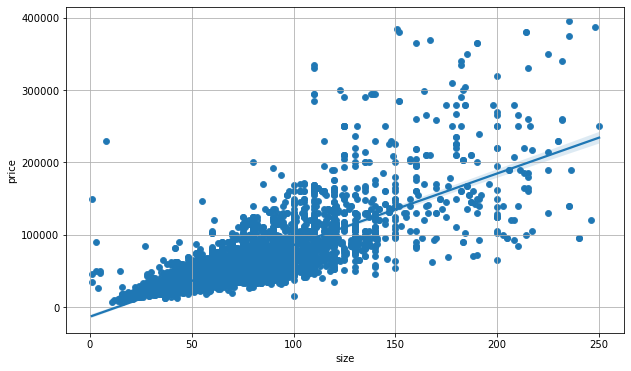

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='size', y='price')
plt.xlabel('Size')
plt.ylabel('Price')
sns.regplot(data=df, x='size', y='price')
plt.grid()
plt.show()

In [20]:
# plt.figure(figsize=(20,10))
# sns.scatterplot(data=df, x=df['size'], y=df['price'], hue="max_levels", s=100) # s=100 nuqtalar hajmi
# plt.show()

In [21]:
df.drop(df[(df["size"] < 10) & (df["price"] > 30000)].index, inplace=True)

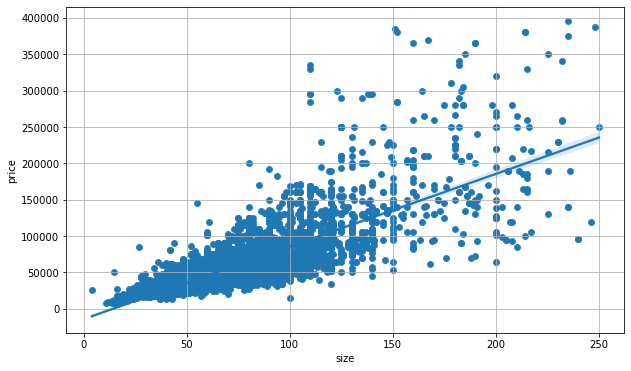

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='size', y='price')
plt.xlabel('Size')
plt.ylabel('Price')
sns.regplot(data=df, x='size', y='price')
plt.grid()
plt.show()

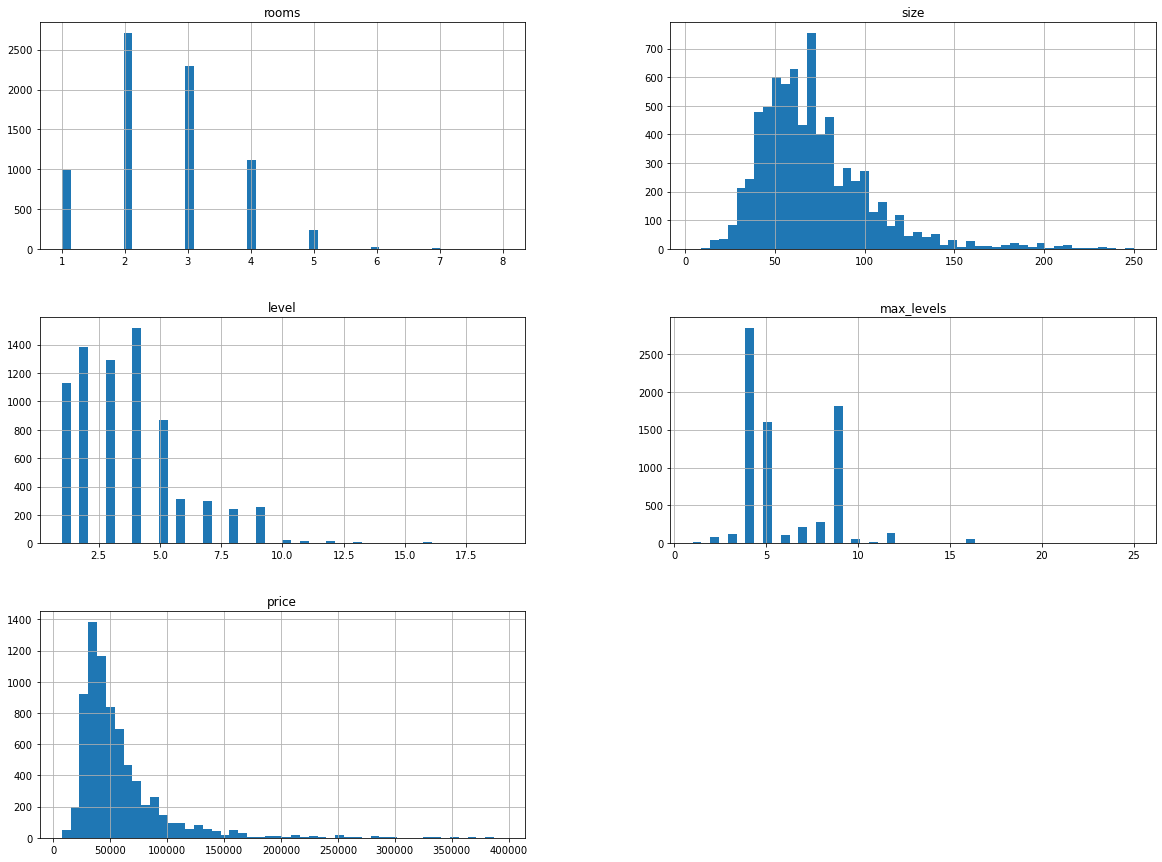

In [23]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

In [24]:
print(df.isnull().sum())

location      0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64


In [25]:
df['district'].value_counts()

Чиланзарский         1627
Мирзо-Улугбекский    1359
Учтепинский           870
Юнусабадский          859
Мирабадский           755
Яккасарайский         642
Яшнободский           460
Шайхантахурский       363
Олмазорский           264
Сергелийский          158
Янгихаётский           14
Бектемирский            8
Name: district, dtype: int64

In [26]:
df.describe()

,rooms,size,level,max_levels,price
count,7379.000000,7379.000000,7379.000000,7379.000000,7379.000000
mean,2.598726,71.534083,3.701721,6.026426,57314.351403
std,1.040572,31.405191,2.235416,2.609122,39611.733773
min,1.000000,4.000000,1.000000,1.000000,7300.000000
25%,2.000000,50.000000,2.000000,4.000000,35000.000000
50%,2.000000,65.000000,3.000000,5.000000,46000.000000
75%,3.000000,85.000000,5.000000,9.000000,66000.000000
max,8.000000,250.000000,19.000000,25.000000,395000.000000


In [55]:
df.to_csv('clean_housing', index=False)

Now our data we cleaned outliners and our min price is 7300 and max price 425000 whereas max size 300 which is looking normal so far

Data Preparation

Changing categorical text column into numerical 

In [29]:
housing_cat = df[['district']]

In [31]:
housing_cat.head()

,district
0,Юнусабадский
1,Яккасарайский
2,Чиланзарский
3,Чиланзарский
4,Чиланзарский


In [33]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[8.],
       [9.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [9.],
       [5.],
       [6.]])

Normalization of data with StandardScaler

In [47]:
X_num = df.drop(['district', 'location'],axis=1)

In [48]:
X_num.head()

,rooms,size,level,max_levels,price
0,3,57,4,4,52000
1,2,52,4,5,56000
2,2,42,4,4,37000
3,3,65,1,4,49500
4,3,70,3,5,55000


In [49]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standard_scaler.fit_transform(X_num)

array([[ 0.38565424, -0.46282375,  0.13344233, -0.7767226 , -0.13417013],
       [-0.57542062, -0.62204389,  0.13344233, -0.39342587, -0.03318311],
       [-0.57542062, -0.94048416,  0.13344233, -0.7767226 , -0.51287147],
       ...,
       [-0.57542062, -0.23991555, -0.31393203,  1.13976108, -0.4371312 ],
       [-1.53649548, -1.70474083, -1.20868075, -0.7767226 , -1.16928712],
       [-1.53649548, -1.3226125 , -0.76130639, -0.7767226 , -0.86849727]])